# Costas Loop
#### This version of the Costas Loop was designed by mirroring the block diagram (Borre, pg 94) rather than using feedback loop design techniques. Each cell represents an block in the diagram.

## Initialization of variables

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Initializations

phi = 0
phi_hat = 0.3      # phi_hat is the output phase 
freq_offset = 0.3
delta_phi = 0.0    # delta_phi is the phase difference between the incomming signal and the VCO
Zeta = 0.707
Bn = 20
wn = (2*Bn) / (Zeta + 1/(4*Zeta))          # wn is omega_n, pll bandwidth
print(wn)
zeta = 0.707       # Damping factor of the loop
K = 1000           # K = loop gain, which I assume can be chosen, but this is a sample value
N = 4092         # Number of samples
fs = 4.092 *10**6  # Sampling frequency
ts = 1/fs          # Sampling time


noise_power = 0
noise_mean = 0

# These are just initializing some vectors for plotting
ref = np.linspace(0, N, N)

37.714259804307275


## "NCO carrier generator" and "90 degree" blocks
The NCO and the 90 degree offset NCO (called NCO90) are simple LUTs (lookup tables) whos indexes correlate to the indexes of the descriminator. 

In [61]:
f = 10000
theta = 0.0
thetaIncr = 2**15 *f*(2*np.pi)/fs
NCO = []
NCO90 = []
for i in ref:
    NCO.append(np.cos(theta))
    NCO90.append(np.sin(theta))
    theta += thetaIncr

0.881695040608
-0.471819727615


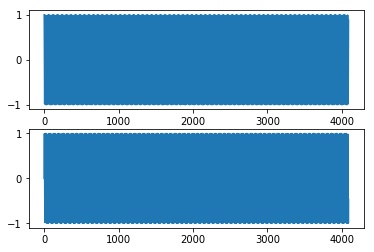

In [62]:
print(NCO[4091])
print(NCO90[4091])

plt.subplot(2, 1, 1)
plt.plot(ref, NCO)
plt.subplot(2, 1, 2)
plt.plot(ref, NCO90)
plt.show()

## "Incoming signal" block

In [2]:
def tstSignalGen(ref, phi, freq_offset):
    signal = []       # Save the signal_in for plotting
    for i in ref:

        # Complex input signal
        signal_in = np.cos(phi) + 1j*np.sin(phi)
        phi += freq_offset

        signal.append(signal_in) # Saved for plotting
    return signal

## Multiply "incoming signal" and "NCO carrier generator" 

In [ ]:
inputsignal = np.array(tstSignalGen(ref, phi, freq_offset))


plt.plot(NCO, ref)

## "PRN code" block
#### Uses the GoldCode class

In [4]:
Satellite = 1

# Create list of C/A code Taps, for simpler sat selection",
#sat = [(2,6),(3,7),(4,8),(5,9),(1,9),(2,6),(1,8),(2,9),(3,10),(2,3),(3,4),(5,6),(6,7),(7,8),(8,9),(9,10),(1,4),(2,5),(3,6),(4,7),(5,8),(6,9),(1,3),(4,6),(5,7),(6,8),(7,9),(8,10),(1,6),(2,7),(3,8),(4,9),(5,10),(4,10),(1,7),(2,8),(4,10)]
sat = [(1,5),(2,6),(3,7),(4,8),(0,8),(1,5),(0,7),(1,8),(2,9),(1,2),(2,3),(4,5),(5,6),(6,7),(7,8),(8,9),(0,3),(1,4),(2,5),(3,6),(4,7),(5,8),(0,2),(3,5),(4,6),(5,7),(6,8),(7,9),(0,5),(1,6),(2,7),(3,8),(4,9),(3,9),(0,6),(1,7),(3,9)]

# Create Code Generator object for chosen Satellite
CodeGen = GoldCode(sat[Satellite - 1]) # Index starts at zero

# Generate CA Code
CACode = CodeGen.getCode(1023)

# Repeat each chip 4 times (See markdown in above cell), to match our ADC sample frequency",
CACodeSampled = np.repeat(CACode,4)

# Repeat entire array for each ms of data sampled
CACodeSampled = np.tile(CACodeSampled,int(SampleLength*1000))

print(CACodeSampled)
print(len(CACodeSampled))

NameError: name 'GoldCode' is not defined

## "Carrier loop discriminator" block
#### There are three possible discriminators as described in Borre, pg 94-95, two of which are included but commented out. 

In [6]:
descriminator = np.arctan(Q/I) # This is the most precise discriminator, but it also takes the most time.
# descriminator = I*Q # This discriminator is the fastest, but least precise
# descriminator = math.sign(I) * Q

NameError: name 'Q' is not defined

## Multiply "Incoming signal" and PRN code" blocks

In [27]:
satCode = GoldCode(tap)
code = satCode.getCode(1023)
tstSignal = np.array(tstSignalGen(self))
# Repeat each chip 4 times (See markdown in above cell), to match our ADC sample frequency",
CACodeSampled = np.repeat(code,4)
print("Satellite chosen: %d, with tap: %s" %(Satellite,str(sat[Satellite - 1])))

# Repeat entire array for each ms of data sampled
CACodeSampled = np.tile(CACodeSampled,int(SampleLength*1000))

INxPRN = tstSignal[0:40920] * CACodeSampled
#print(satCode)
#print()
#print(code)
#print()
#print(tstSig)
#print()
#print(INxPRN)

print(len(CACodeSampled))
print(len(tstSignal))

#plt.plot(ref[1:100], INxPRN[1:100])
#plt.show()
#plt.plot(ref[1:100], code[1:100])
#plt.show()
#plt.plot(ref[1:100], tstSig[1:100])
#plt.show()

NameError: name 'self' is not defined

## "Lowpass filter" blocks
#### Considering the filter only needs to handle 2f, a simple first-order filter seems to be sufficient

In [ ]:
scipy.signal.butter(2, )

## Carrier loop filter" block